In [1]:
from sklearn.datasets import make_circles
import pandas as pd

n_samples = 1000

X, y = make_circles(
    n_samples=n_samples,
    noise=0.03,
    random_state=43
)

In [2]:
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})

circles.head()

,X1,X2,label
0,-0.124570,-0.785914,1
1,0.772370,-0.158252,1
2,-0.657123,0.768114,0
3,0.794009,0.051699,1
4,-0.642243,0.361384,1


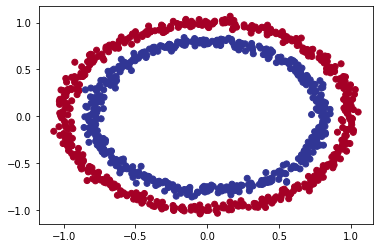

In [3]:
import matplotlib.pyplot as plt 
plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c=y,
    cmap=plt.cm.RdYlBu
);

In [4]:
import torch
from torch import nn

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [6]:
class CircleModelV1(nn.Module):

    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):

        return self.layer_2(self.layer_1(x))

model_0 = CircleModelV1()
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [7]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1972,  0.6429],
                      [ 0.3286, -0.4411],
                      [ 0.5186, -0.0715],
                      [ 0.2363,  0.4436],
                      [-0.4223,  0.4413]])),
             ('0.bias', tensor([-0.4739, -0.1799, -0.1701, -0.3899, -0.6082])),
             ('1.weight', tensor([[0.0845, 0.0046, 0.0571, 0.2114, 0.2773]])),
             ('1.bias', tensor([0.0224]))])

In [8]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [9]:
def accuracy_function(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [10]:
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_test)
y_logits[:5]

y_pred_probs = torch.sigmoid(y_logits[:5])
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

BUild the train and test loop

In [11]:
epochs = 100

for epoch in range(epochs):

    model_1.train()

    y_logits = model_1(X_train).squeeze()

    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    accuracy = accuracy_function(y_true=y_train, y_pred=y_pred)

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
         
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_function(y_true=y_test, y_pred=test_pred)

    if(epoch%10 == 0):
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70921 | Accuracy: 49.25% | Test Loss: 0.69471 | Test Accuracy: 52.00%
Epoch: 10 | Loss: 0.70011 | Accuracy: 50.75% | Test Loss: 0.71516 | Test Accuracy: 47.00%
Epoch: 20 | Loss: 0.69455 | Accuracy: 50.75% | Test Loss: 0.69616 | Test Accuracy: 50.50%
Epoch: 30 | Loss: 0.70715 | Accuracy: 49.25% | Test Loss: 0.69519 | Test Accuracy: 53.00%
Epoch: 40 | Loss: 0.69423 | Accuracy: 50.75% | Test Loss: 0.70299 | Test Accuracy: 47.00%
Epoch: 50 | Loss: 0.70196 | Accuracy: 50.75% | Test Loss: 0.71174 | Test Accuracy: 47.00%
Epoch: 60 | Loss: 0.69628 | Accuracy: 49.25% | Test Loss: 0.69319 | Test Accuracy: 53.00%
Epoch: 70 | Loss: 0.69833 | Accuracy: 49.25% | Test Loss: 0.69111 | Test Accuracy: 53.00%
Epoch: 80 | Loss: 0.70555 | Accuracy: 50.75% | Test Loss: 0.71843 | Test Accuracy: 47.00%
Epoch: 90 | Loss: 0.69516 | Accuracy: 44.88% | Test Loss: 0.69060 | Test Accuracy: 53.00%


In [12]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    pass
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

    with open("helper_functions.py", 'wb') as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

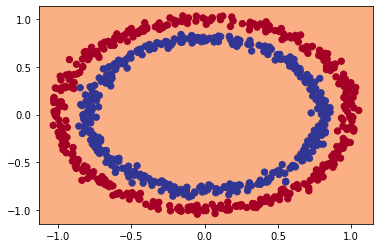

In [13]:
plot_decision_boundary(model_1, X_train, y_train)

In [14]:
class CircleModelV2(nn.Module):

    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):

        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [15]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [16]:
epochs = 1000

for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(X_train)
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_pred)
    accuracy = sum([1 for i in range(y_pred.shape[0]) if y_pred[i] == y_train[i]])/y_pred.shape[0]*100

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
         
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_function(y_true=y_test, y_pred=test_pred)

    if(epoch % 100 == 0):
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.60407 | Accuracy: 49.25% | Test Loss: 0.69077 | Test Accuracy: 53.00%
Epoch: 100 | Loss: 0.01198 | Accuracy: 49.25% | Test Loss: 2.09164 | Test Accuracy: 53.00%
Epoch: 200 | Loss: 0.00389 | Accuracy: 49.25% | Test Loss: 2.61051 | Test Accuracy: 53.00%
Epoch: 300 | Loss: 0.00212 | Accuracy: 49.25% | Test Loss: 2.89425 | Test Accuracy: 53.00%
Epoch: 400 | Loss: 0.00140 | Accuracy: 49.25% | Test Loss: 3.08794 | Test Accuracy: 53.00%
Epoch: 500 | Loss: 0.00102 | Accuracy: 49.25% | Test Loss: 3.23443 | Test Accuracy: 53.00%
Epoch: 600 | Loss: 0.00080 | Accuracy: 49.25% | Test Loss: 3.35196 | Test Accuracy: 53.00%
Epoch: 700 | Loss: 0.00065 | Accuracy: 49.25% | Test Loss: 3.44995 | Test Accuracy: 53.00%
Epoch: 800 | Loss: 0.00054 | Accuracy: 49.25% | Test Loss: 3.53388 | Test Accuracy: 53.00%
Epoch: 900 | Loss: 0.00046 | Accuracy: 49.25% | Test Loss: 3.60724 | Test Accuracy: 53.00%


In [17]:
def accuracy_function(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [18]:
sum([1 for i in range(y_pred.shape[0]) if y_pred[i] == y_train[i]])

394

Stuff didnt work. Lets try again


In [30]:
class CircleModelV4(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_4 = CircleModelV4()
model_4

CircleModelV4(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [34]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

In [35]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc


In [39]:
# Fit the model
torch.manual_seed(42)
epochs = 1000


for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_4(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.53082, Accuracy: 86.62% | Test Loss: 0.54471, Test Accuracy: 85.00%
Epoch: 100 | Loss: 0.43433, Accuracy: 92.75% | Test Loss: 0.44814, Test Accuracy: 88.50%
Epoch: 200 | Loss: 0.31737, Accuracy: 97.75% | Test Loss: 0.33450, Test Accuracy: 97.00%
Epoch: 300 | Loss: 0.21086, Accuracy: 99.62% | Test Loss: 0.22950, Test Accuracy: 98.50%
Epoch: 400 | Loss: 0.14331, Accuracy: 99.62% | Test Loss: 0.16013, Test Accuracy: 99.00%
Epoch: 500 | Loss: 0.10243, Accuracy: 99.75% | Test Loss: 0.11583, Test Accuracy: 99.50%
Epoch: 600 | Loss: 0.07861, Accuracy: 99.88% | Test Loss: 0.09100, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.06338, Accuracy: 100.00% | Test Loss: 0.07494, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.05294, Accuracy: 100.00% | Test Loss: 0.06371, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.04543, Accuracy: 100.00% | Test Loss: 0.05546, Test Accuracy: 99.50%


In [40]:
model_4.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_4(X_test))).squeeze()

y_pred[:10], y_test[:10]

(tensor([1., 0., 1., 1., 0., 1., 1., 0., 1., 1.], grad_fn=<SliceBackward0>),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

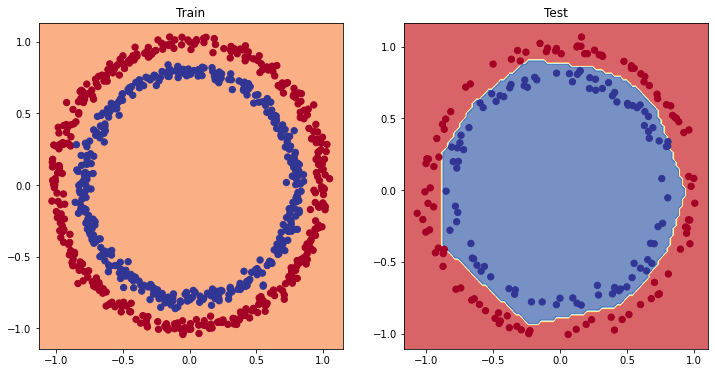

In [41]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test) # model_3 = has non-linearity

Multiclass classification

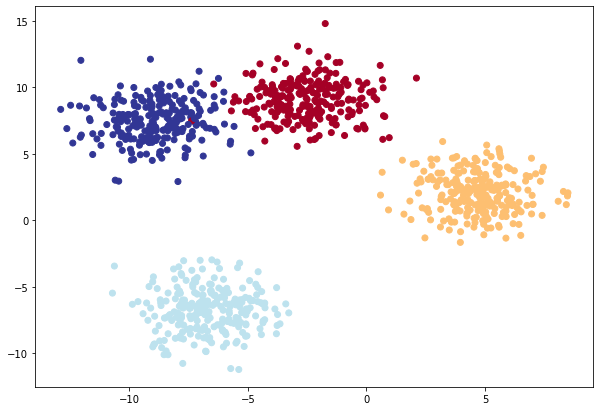

In [59]:
import torch
from matplotlib.pyplot import plot
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [60]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):

        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

Model = BlobModel(input_features=2, output_features=4, hidden_units=8)

In [61]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=Model.parameters(), lr=0.01)

In [62]:
epochs = 1000

for epoch in range(epochs):
    Model.train()

    y_logits = Model(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_pred=y_pred, y_true=y_blob_train)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    Model.eval()
    with torch.inference_mode():
        # 1. Forward pass
      test_logits = Model(X_blob_test) 
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)# logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy 
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
    

Epoch: 0 | Loss: 1.42824, Accuracy: 25.62% | Test Loss: 1.39504, Test Accuracy: 26.00%
Epoch: 100 | Loss: 0.78427, Accuracy: 73.12% | Test Loss: 0.72118, Test Accuracy: 79.50%
Epoch: 200 | Loss: 0.53057, Accuracy: 80.25% | Test Loss: 0.47399, Test Accuracy: 85.00%
Epoch: 300 | Loss: 0.35839, Accuracy: 95.50% | Test Loss: 0.30939, Test Accuracy: 96.50%
Epoch: 400 | Loss: 0.24761, Accuracy: 99.00% | Test Loss: 0.20947, Test Accuracy: 99.00%
Epoch: 500 | Loss: 0.16783, Accuracy: 99.12% | Test Loss: 0.14024, Test Accuracy: 99.50%
Epoch: 600 | Loss: 0.11202, Accuracy: 99.25% | Test Loss: 0.09244, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.07830, Accuracy: 99.25% | Test Loss: 0.06376, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.05993, Accuracy: 99.25% | Test Loss: 0.04793, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.04957, Accuracy: 99.25% | Test Loss: 0.03879, Test Accuracy: 99.50%


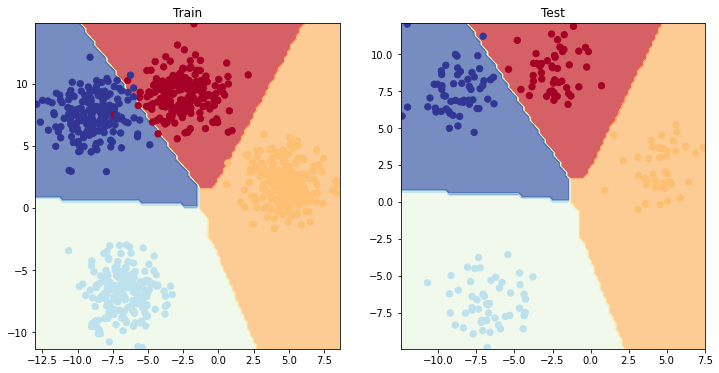

In [63]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(Model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(Model, X_blob_test, y_blob_test)

In [64]:
from torchmetrics import Accuracy

ModuleNotFoundError: No module named 'torchmetrics'